<h1><center>Prepaid Plans Comparison</center></h1>

*Statistical Analysis Unit*

## Description of Project

### Objective
Telecom operator, Megaline, offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
The following is a preliminary analysis of the plans based on a relatively small client selection: 500 clients. The analysis covers who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. 

<u>Description of the plans</u>
Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

### Data 
1. **Surf**
- Monthly charge: \$20<br>
- 500 monthly minutes, 50 texts, and 15 GB of data<br>
- After exceeding the package limits:<br>
- 1 minute: 3 cents<br>
- 1 text message: 3 cents<br>
- 1 GB of data: \$10
<br>
<br>
2. **Ultimate**
- Monthly charge: \$70<br>
- 3000 monthly minutes, 1000 text messages, and 30 GB of data<br>
- After exceeding the package limits:<br>
- 1 minute: 1 cent<br>
- 1 text message: 1 cent<br>
- 1 GB of data: \$7
<br>
<br>
1. The users table (data on users):
- `user_id` — unique user identifier
- `first_name` — user's name
- `last_name` — user's last name
- `age` — user's age (years)
- `reg_date` — subscription date (dd, mm, yy)
- `churn_date` — the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted)
- `city` — user's city of residence
- `plan` — calling plan name
<br>
2. The calls table (data on calls):
- `id` — unique call identifier
- `call_date` — call date
- `duration` — call duration (in minutes)
- `user_id` — the identifier of the user making the call
<br>
3. The messages table (data on texts):
- `id` — unique text message identifier
- `message_date` — text message date
- `user_id` — the identifier of the user sending the text
<br>
4. The internet table (data on web sessions):
- `id` — unique session identifier
- `mb_used` — the volume of data spent during the session (in megabytes)
- `session_date` — web session date
- `user_id` — user identifier
<br>
5.The plans table (data on the plans):
- `plan_name` — calling plan name
- `usd_monthly_fee` — monthly charge in US dollars
- `minutes_included` — monthly minute allowance
- `messages_included` — monthly text allowance
- `mb_per_month_included` — data volume allowance (in megabytes)
- `usd_per_minute` — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
- `usd_per_message` — price per text after exceeding the package limits
- `usd_per_gb` — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)


## Setup 

### Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
import pylab as pl
import math
import seaborn as sns
from scipy import stats as st

In [2]:
#Loading all data
calls=pd.read_csv('megaline_calls.csv')
internet=pd.read_csv('megaline_internet.csv')
messages=pd.read_csv('megaline_messages.csv')
plans=pd.read_csv('megaline_plans.csv')
users=pd.read_csv('megaline_users.csv')

### Explore Each Dataset

In [3]:
#list of dfs and names for for loops
listdf=[calls,internet,messages,plans,users]

calls.myname ='Calls'
users.myname ='Users'
internet.myname ='Internet'
messages.myname ='Messages'
plans.myname ='Plans'

#Overview of dfs
for i in listdf:
    display(i.myname,i.head())
    display(i.info())

'Calls'

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

'Internet'

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

'Messages'

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

'Plans'

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

'Users'

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

In [4]:
#Sum duration for each user
calls.groupby('user_id')['duration'].sum().sort_values().head()

user_id
1306     4.60
1034     5.31
1104     8.73
1323    27.03
1481    33.19
Name: duration, dtype: float64

In [5]:
#Checking for duplicates
calls.duplicated().sum()+internet.duplicated().sum()+messages.duplicated().sum()+users.duplicated().sum()

0

In [6]:
#check to see if any mispellings are hiding duplicates
pd.set_option('display.max_rows', None)
users['city'].value_counts().sort_index()

Albany-Schenectady-Troy, NY MSA                      1
Albuquerque, NM MSA                                  2
Atlanta-Sandy Springs-Roswell, GA MSA               14
Austin-Round Rock-Georgetown, TX MSA                 5
Bakersfield, CA MSA                                  4
Baltimore-Columbia-Towson, MD MSA                    4
Baton Rouge, LA MSA                                  6
Birmingham-Hoover, AL MSA                            4
Boston-Cambridge-Newton, MA-NH MSA                  12
Bridgeport-Stamford-Norwalk, CT MSA                  3
Buffalo-Cheektowaga, NY MSA                          2
Cape Coral-Fort Myers, FL MSA                        1
Charleston-North Charleston, SC MSA                  3
Charlotte-Concord-Gastonia, NC-SC MSA                8
Chicago-Naperville-Elgin, IL-IN-WI MSA              19
Cincinnati, OH-KY-IN MSA                             8
Cleveland-Elyria, OH MSA                             3
Colorado Springs, CO MSA                             2
Columbia, 

NULL VALUES: The only dataframe with null values in the Users for which `churn_date` only has 34 entries while the rest have 500. According to the explanation given, the `churn_date` is "the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted)". Therefore users with no `churn_date` are still using the service.

LINKING DATAFRAMES: Each dataframe has a different number of entries. In theory, each can be combined based on the `user_id` (except for plans as this is more of a reference), but best to concatenate and ignore the common factors for the purposes of the combining (will come into play later for the analysis). While each dataframe is not missing values, combining the dataframes may reveal missing values. 

DATA TYPES: Each column with a date value should be changed to datetime type.

### Cleaning Data and Combining Datasets

I will prepare the datasets to be combined. 

Steps:
1. Change datatypes to datetime where appropriate
2. Change the column titles for these to be the same for the messages, calls, and internet dataframes.
3. Add column to messages, calls, and internet with the values being the title of the dataset. This way when the sets are combined, it will be easy to identify what type of use it was. 
4. Add the plan type for each user to the combined dataset.
5. Get rid of 'MSA' from the end of each string in the City column

#### Change columns to datetime

In [7]:
#Uniform date column and change to timedate
calls['date'] =  pd.to_datetime(calls['call_date'], infer_datetime_format=True)
messages['date'] =  pd.to_datetime(messages['message_date'], infer_datetime_format=True)
internet['date'] =  pd.to_datetime(internet['session_date'], infer_datetime_format=True)

#Check to ensure in same format
frames = [calls, messages, internet]
for i in frames:
    display(i.myname,i['date'].head())

'Calls'

0   2018-12-27
1   2018-12-27
2   2018-12-27
3   2018-12-28
4   2018-12-30
Name: date, dtype: datetime64[ns]

'Messages'

0   2018-12-27
1   2018-12-31
2   2018-12-31
3   2018-12-27
4   2018-12-26
Name: date, dtype: datetime64[ns]

'Internet'

0   2018-12-29
1   2018-12-31
2   2018-12-28
3   2018-12-26
4   2018-12-27
Name: date, dtype: datetime64[ns]

In [8]:
#Drop the original date columns from each
calls=calls.drop('call_date',axis=1)
messages=messages.drop('message_date',axis=1)
internet=internet.drop('session_date',axis=1)

#### Prep and combine calls, messages, and internet datasets

In [9]:
#Add type column to each of the 3 dataframes
for i in frames:
    i['type']=i.myname.lower()
    display(i.myname,i['type'].head(2))

'Calls'

0    calls
1    calls
Name: type, dtype: object

'Messages'

0    messages
1    messages
Name: type, dtype: object

'Internet'

0    internet
1    internet
Name: type, dtype: object

In [10]:
#Concatenate dataframes
all_uses = pd.concat(frames)

if len(all_uses)==len(calls)+len(messages)+len(internet):
    print('Concat worked!\n', all_uses.head())
else:
    print('Something wrong')

Concat worked!
          id  user_id   call_date  duration       date   type message_date  \
0   1000_93     1000  2018-12-27      8.52 2018-12-27  calls          NaN   
1  1000_145     1000  2018-12-27     13.66 2018-12-27  calls          NaN   
2  1000_247     1000  2018-12-27     14.48 2018-12-27  calls          NaN   
3  1000_309     1000  2018-12-28      5.76 2018-12-28  calls          NaN   
4  1000_380     1000  2018-12-30      4.22 2018-12-30  calls          NaN   

  session_date  mb_used  
0          NaN      NaN  
1          NaN      NaN  
2          NaN      NaN  
3          NaN      NaN  
4          NaN      NaN  


In [11]:
#Checking there are null values for mb_used and duration as these only existed in one of the original dataframes, not all 3.
all_uses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318611 entries, 0 to 104824
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            318611 non-null  object        
 1   user_id       318611 non-null  int64         
 2   call_date     137735 non-null  object        
 3   duration      137735 non-null  float64       
 4   date          318611 non-null  datetime64[ns]
 5   type          318611 non-null  object        
 6   message_date  76051 non-null   object        
 7   session_date  104825 non-null  object        
 8   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 24.3+ MB


#### Add select info from remaining datasets

First, I will look at the number of users in the combine dataset and compare it to the users dataset, where the plan information lives. As seen above, the users dataset contains 500 users, 34 of which are inactive. If the number of users in the combined dataset != the number of users in the users dataset, I will look at which are not found in 1 or the other.

In [12]:
#Number of unique users in combined dataset
print(all_uses['user_id'].nunique())

490


In [13]:
#Identify the 10 values in users not found in all_uses
ten_values=users[~users['user_id'].isin(all_uses['user_id'])]
ten_values

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
25,1025,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,NaN
129,1129,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27
143,1143,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,NaN
269,1269,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15
275,1275,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,NaN
307,1307,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,NaN
319,1319,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,NaN
378,1378,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,NaN
463,1463,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,NaN
473,1473,Kirk,Velez,61,"Louisville/Jefferson County, KY-IN MSA",2018-12-31,surf,NaN


In [14]:
#Check if any values in all_uses not in users.
sanity_check=all_uses[~all_uses['user_id'].isin(users['user_id'])]
sanity_check

,id,user_id,call_date,duration,date,type,message_date,session_date,mb_used


- I do not see anything in common among the users found in the users df but not the all_uses df. It's plausible that these users did not use their purchased plan during the timeframe of the data export.

In [15]:
#Create new dataset merging info from users and all_uses. 
#Drop first and last name columns because not necessary since already have a unique identifier.
telecom_all = all_uses.merge(users, on='user_id').drop(['first_name','last_name'],axis=1)
print(telecom_all.info())
telecom_all.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318611 entries, 0 to 318610
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            318611 non-null  object        
 1   user_id       318611 non-null  int64         
 2   call_date     137735 non-null  object        
 3   duration      137735 non-null  float64       
 4   date          318611 non-null  datetime64[ns]
 5   type          318611 non-null  object        
 6   message_date  76051 non-null   object        
 7   session_date  104825 non-null  object        
 8   mb_used       104825 non-null  float64       
 9   age           318611 non-null  int64         
 10  city          318611 non-null  object        
 11  reg_date      318611 non-null  object        
 12  plan          318611 non-null  object        
 13  churn_date    20862 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 

,id,user_id,call_date,duration,date,type,message_date,session_date,mb_used,age,city,reg_date,plan,churn_date
0,1000_93,1000,2018-12-27,8.52,2018-12-27,calls,NaN,NaN,NaN,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1000_145,1000,2018-12-27,13.66,2018-12-27,calls,NaN,NaN,NaN,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
2,1000_247,1000,2018-12-27,14.48,2018-12-27,calls,NaN,NaN,NaN,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
3,1000_309,1000,2018-12-28,5.76,2018-12-28,calls,NaN,NaN,NaN,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
4,1000_380,1000,2018-12-30,4.22,2018-12-30,calls,NaN,NaN,NaN,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN


In [16]:
#date columns to datetime
telecom_all['reg_date'] =  pd.to_datetime(telecom_all['reg_date'], infer_datetime_format=True)
telecom_all['churn_date'] =  pd.to_datetime(telecom_all['churn_date'], infer_datetime_format=True)

#create month column needed for analysis
telecom_all['month']=pd.DatetimeIndex(telecom_all['date']).month
telecom_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318611 entries, 0 to 318610
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            318611 non-null  object        
 1   user_id       318611 non-null  int64         
 2   call_date     137735 non-null  object        
 3   duration      137735 non-null  float64       
 4   date          318611 non-null  datetime64[ns]
 5   type          318611 non-null  object        
 6   message_date  76051 non-null   object        
 7   session_date  104825 non-null  object        
 8   mb_used       104825 non-null  float64       
 9   age           318611 non-null  int64         
 10  city          318611 non-null  object        
 11  reg_date      318611 non-null  datetime64[ns]
 12  plan          318611 non-null  object        
 13  churn_date    20862 non-null   datetime64[ns]
 14  month         318611 non-null  int64         
dtypes: datetime64[ns]

In [17]:
#Number of unique plans in combined dataset (which should equal 2)
telecom_all['plan'].nunique()

2

In [18]:
#Delete "MSA" string from end of City values (just to make it cleaner)
telecom_all['city']=telecom_all['city'].str.replace('MSA','')
telecom_all['city'].value_counts().sort_index().head()

Albany-Schenectady-Troy, NY           1033
Albuquerque, NM                       1565
Atlanta-Sandy Springs-Roswell, GA     6890
Austin-Round Rock-Georgetown, TX      3584
Bakersfield, CA                       1027
Name: city, dtype: int64

In [19]:
telecom_all['duration']=telecom_all['duration'].apply(np.ceil)

## Prepare Data

1. Divide data depending on whether the user is from the NY-NJ area or not (to prepare for related hypothesis.)
2. For each user, find:
    1. The number of calls made and minutes used per month
    2. The number of text messages sent per month
    3. The volume of data per month
    4. The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

### Divide NY-NJ

In [20]:
def assign_nynj_status(city):
        
    if 'NY' in (city) or 'NJ'in (city):
        return True 
    else: 
        return False
   
 # Apply function assign_age_group    
telecom_all['ny_nj']=telecom_all['city'].apply(assign_nynj_status)
telecom_all.head()

,id,user_id,call_date,duration,date,type,message_date,session_date,mb_used,age,city,reg_date,plan,churn_date,month,ny_nj
0,1000_93,1000,2018-12-27,9.0,2018-12-27,calls,NaN,NaN,NaN,45,"Atlanta-Sandy Springs-Roswell, GA",2018-12-24,ultimate,NaT,12,False
1,1000_145,1000,2018-12-27,14.0,2018-12-27,calls,NaN,NaN,NaN,45,"Atlanta-Sandy Springs-Roswell, GA",2018-12-24,ultimate,NaT,12,False
2,1000_247,1000,2018-12-27,15.0,2018-12-27,calls,NaN,NaN,NaN,45,"Atlanta-Sandy Springs-Roswell, GA",2018-12-24,ultimate,NaT,12,False
3,1000_309,1000,2018-12-28,6.0,2018-12-28,calls,NaN,NaN,NaN,45,"Atlanta-Sandy Springs-Roswell, GA",2018-12-24,ultimate,NaT,12,False
4,1000_380,1000,2018-12-30,5.0,2018-12-30,calls,NaN,NaN,NaN,45,"Atlanta-Sandy Springs-Roswell, GA",2018-12-24,ultimate,NaT,12,False


In [21]:
#City values included in ny_nj
telecom_all[telecom_all['ny_nj']==True]['city'].unique()

array(['New York-Newark-Jersey City, NY-NJ-PA ',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD ',
       'Buffalo-Cheektowaga, NY ', 'Albany-Schenectady-Troy, NY ',
       'Rochester, NY '], dtype=object)

### Metrics Per User Per Month

<u>Steps</u>:
1. Per user
2. Billing

In [22]:
#Breakdown of type by user
type_pivot=telecom_all.pivot_table(index=['user_id','month'], columns='type', values='city', aggfunc='count')
type_pivot.head(10)

type           calls  internet  messages
user_id month                           
1000    12      16.0       5.0      11.0
1001    8       27.0      25.0      30.0
        9       49.0      53.0      44.0
        10      65.0      56.0      53.0
        11      64.0      51.0      36.0
        12      56.0      60.0      44.0
1002    10      11.0      21.0      15.0
        11      55.0      52.0      32.0
        12      47.0      51.0      41.0
1003    12     149.0      52.0      50.0

In [23]:
#Number of calls made and duration by user per month.
use_pivot=telecom_all.pivot_table(index=['user_id','month'], values=['mb_used','duration'], aggfunc='sum')
use_pivot.head()

duration   mb_used
user_id month                    
1000    12        124.0   1901.47
1001    8         182.0   6919.15
        9         315.0  13314.82
        10        393.0  22330.49
        11        426.0  18504.30

In [24]:
#Merge pivots
user_merge=type_pivot.merge(use_pivot,on=['user_id','month'])
user_merge.head()

calls  internet  messages  duration   mb_used
user_id month                                               
1000    12      16.0       5.0      11.0     124.0   1901.47
1001    8       27.0      25.0      30.0     182.0   6919.15
        9       49.0      53.0      44.0     315.0  13314.82
        10      65.0      56.0      53.0     393.0  22330.49
        11      64.0      51.0      36.0     426.0  18504.30

In [25]:
#merge with other useful info from telecom_all dataset
final_data=user_merge.merge(telecom_all[['plan','ny_nj','user_id','month']], on=['user_id','month'], how='left').drop_duplicates().reset_index().drop('index',axis=1)
print(final_data['user_id'].nunique())
final_data.head()

490


,user_id,month,calls,internet,messages,duration,mb_used,plan,ny_nj
0,1000,12,16.0,5.0,11.0,124.0,1901.47,ultimate,False
1,1001,8,27.0,25.0,30.0,182.0,6919.15,surf,False
2,1001,9,49.0,53.0,44.0,315.0,13314.82,surf,False
3,1001,10,65.0,56.0,53.0,393.0,22330.49,surf,False
4,1001,11,64.0,51.0,36.0,426.0,18504.30,surf,False


In [26]:
final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,2293.0,1246.075883,143.051927,1000.0,1122.00,1245.00,1368.00,1499.00
month,2293.0,9.172700,2.496386,1.0,8.00,10.00,11.00,12.00
calls,2258.0,60.998671,31.770869,1.0,39.00,60.00,80.00,205.00
internet,2277.0,46.036451,19.275885,1.0,35.00,48.00,58.00,138.00
messages,1806.0,42.110188,33.122931,1.0,17.00,34.00,59.00,266.00
duration,2293.0,429.283471,236.320077,0.0,265.00,425.00,572.00,1510.00
mb_used,2293.0,16764.397606,7967.237527,0.0,12235.76,16830.64,20999.84,70931.59


In [27]:
#Round up duration column as fraction of minute counts as a minute for billing
final_data['duration']=final_data['duration'].apply(np.ceil)
final_data.head()

,user_id,month,calls,internet,messages,duration,mb_used,plan,ny_nj
0,1000,12,16.0,5.0,11.0,124.0,1901.47,ultimate,False
1,1001,8,27.0,25.0,30.0,182.0,6919.15,surf,False
2,1001,9,49.0,53.0,44.0,315.0,13314.82,surf,False
3,1001,10,65.0,56.0,53.0,393.0,22330.49,surf,False
4,1001,11,64.0,51.0,36.0,426.0,18504.30,surf,False


In [28]:
#max duration based on plan
print('Duration max for surf:\n',final_data.query('plan=="surf"')['duration'].max())
print()
print('Duration max for ultimate:\n',final_data.query('plan=="ultimate"')['duration'].max())

Duration max for surf:
 1510.0

Duration max for ultimate:
 1369.0


With a duration max of 1369, no user with the ultimate plan would exceed their free package.

In [29]:
#Duration after free package
final_data['new_dur'] = np.where(final_data['plan']== 'surf', final_data['duration']-500, final_data['duration']-3000).clip(min=0)
final_data.describe()

,user_id,month,calls,internet,messages,duration,mb_used,new_dur
count,2293.000000,2293.000000,2258.000000,2277.000000,1806.000000,2293.000000,2293.000000,2293.000000
mean,1246.075883,9.172700,60.998671,46.036451,42.110188,429.283471,16764.397606,42.160925
std,143.051927,2.496386,31.770869,19.275885,33.122931,236.320077,7967.237527,107.799717
min,1000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1122.000000,8.000000,39.000000,35.000000,17.000000,265.000000,12235.760000,0.000000
50%,1245.000000,10.000000,60.000000,48.000000,34.000000,425.000000,16830.640000,0.000000
75%,1368.000000,11.000000,80.000000,58.000000,59.000000,572.000000,20999.840000,0.000000
max,1499.000000,12.000000,205.000000,138.000000,266.000000,1510.000000,70931.590000,1010.000000


In [30]:
#max messages based on plan
print('Messages max for surf:\n',final_data.query('plan=="surf"')['messages'].max())
print()
print('Messages max for ultimate:\n',final_data.query('plan=="ultimate"')['messages'].max())

Messages max for surf:
 266.0

Messages max for ultimate:
 166.0


With a message max of 166, no user with the ultimate plan would exceed their free package.

In [31]:
#Messages after free package
final_data['new_mess'] = np.where(final_data['plan']== 'surf', 
                                  final_data['messages']-50, 
                                  final_data['messages']-1000).clip(min=0)
final_data.describe()

,user_id,month,calls,internet,messages,duration,mb_used,new_dur,new_mess
count,2293.000000,2293.000000,2258.000000,2277.000000,1806.000000,2293.000000,2293.000000,2293.000000,1806.000000
mean,1246.075883,9.172700,60.998671,46.036451,42.110188,429.283471,16764.397606,42.160925,6.107973
std,143.051927,2.496386,31.770869,19.275885,33.122931,236.320077,7967.237527,107.799717,18.322291
min,1000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1122.000000,8.000000,39.000000,35.000000,17.000000,265.000000,12235.760000,0.000000,0.000000
50%,1245.000000,10.000000,60.000000,48.000000,34.000000,425.000000,16830.640000,0.000000,0.000000
75%,1368.000000,11.000000,80.000000,58.000000,59.000000,572.000000,20999.840000,0.000000,0.000000
max,1499.000000,12.000000,205.000000,138.000000,266.000000,1510.000000,70931.590000,1010.000000,216.000000


In [32]:
#Mb_used is rounded up for billing purposes EACH MONTH (vs for each use)

def round_up_to_nearest_1000(mb_used):
    if mb_used>0:
        return math.ceil(mb_used / 1000) * 1000
    else:
        return None

#test
print(round_up_to_nearest_1000(3100)) 

#Create new column
final_data['mb_used']=final_data['mb_used'].apply(round_up_to_nearest_1000)
final_data.head()

4000


,user_id,month,calls,internet,messages,duration,mb_used,plan,ny_nj,new_dur,new_mess
0,1000,12,16.0,5.0,11.0,124.0,2000.0,ultimate,False,0.0,0.0
1,1001,8,27.0,25.0,30.0,182.0,7000.0,surf,False,0.0,0.0
2,1001,9,49.0,53.0,44.0,315.0,14000.0,surf,False,0.0,0.0
3,1001,10,65.0,56.0,53.0,393.0,23000.0,surf,False,0.0,3.0
4,1001,11,64.0,51.0,36.0,426.0,19000.0,surf,False,0.0,0.0


In [33]:
#Mb_used after free package and convert to GB
final_data['new_mb'] = np.where(final_data['plan']== 'surf', (final_data['mb_used']-15000)/1000, (final_data['mb_used']-30000)/1000).clip(min=0)
final_data.describe()

,user_id,month,calls,internet,messages,duration,mb_used,new_dur,new_mess,new_mb
count,2293.000000,2293.000000,2258.000000,2277.000000,1806.000000,2293.000000,2277.000000,2293.000000,1806.000000,2277.000000
mean,1246.075883,9.172700,60.998671,46.036451,42.110188,429.283471,17372.859025,42.160925,6.107973,2.992973
std,143.051927,2.496386,31.770869,19.275885,33.122931,236.320077,7869.052492,107.799717,18.322291,5.107538
min,1000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1000.000000,0.000000,0.000000,0.000000
25%,1122.000000,8.000000,39.000000,35.000000,17.000000,265.000000,13000.000000,0.000000,0.000000,0.000000
50%,1245.000000,10.000000,60.000000,48.000000,34.000000,425.000000,17000.000000,0.000000,0.000000,0.000000
75%,1368.000000,11.000000,80.000000,58.000000,59.000000,572.000000,22000.000000,0.000000,0.000000,5.000000
max,1499.000000,12.000000,205.000000,138.000000,266.000000,1510.000000,71000.000000,1010.000000,216.000000,56.000000


In [34]:
#max mb_used based on plan
print('Mb_used max for surf:\n',final_data.query('plan=="surf"')['new_mb'].max())
print()
print('Mb_used  max for ultimate:\n',final_data.query('plan=="ultimate"')['new_mb'].max())

Mb_used max for surf:
 56.0

Mb_used  max for ultimate:
 17.0


- With a GB max of 17, no user with the ultimate plan would exceed their free package. This means that users with the ultimate plan should all be paying the base fee of $70.

<u>Next Steps</u>:
1. Add bill per month for each type of use.

In [35]:
#udf
def add_bill(x,y):
    if y == 'surf':
        return x*.03
    else:
        return x*.01

#create new columns
final_data[['dur_bill','mess_bill','mb_bill']]  = \
final_data.apply( lambda x: add_bill( x[['new_dur','new_mess','new_mb']], x.plan), axis = 1 )

#check
final_data.head()

,user_id,month,calls,internet,messages,duration,mb_used,plan,ny_nj,new_dur,new_mess,new_mb,dur_bill,mess_bill,mb_bill
0,1000,12,16.0,5.0,11.0,124.0,2000.0,ultimate,False,0.0,0.0,0.0,0.0,0.00,0.00
1,1001,8,27.0,25.0,30.0,182.0,7000.0,surf,False,0.0,0.0,0.0,0.0,0.00,0.00
2,1001,9,49.0,53.0,44.0,315.0,14000.0,surf,False,0.0,0.0,0.0,0.0,0.00,0.00
3,1001,10,65.0,56.0,53.0,393.0,23000.0,surf,False,0.0,3.0,8.0,0.0,0.09,0.24
4,1001,11,64.0,51.0,36.0,426.0,19000.0,surf,False,0.0,0.0,4.0,0.0,0.00,0.12


In [36]:
#Monthly bill per user 
final_data['monthly_bill'] = np.where(final_data['plan'] == 'surf', 
                                      final_data['dur_bill']+final_data['mess_bill']+final_data['mb_bill']+20, 
                                      final_data['dur_bill']+final_data['mess_bill']+final_data['mb_bill']+70)
final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,2293.0,1246.075883,143.051927,1000.0,1122.00,1245.00,1368.00,1499.00
month,2293.0,9.172700,2.496386,1.0,8.00,10.00,11.00,12.00
calls,2258.0,60.998671,31.770869,1.0,39.00,60.00,80.00,205.00
internet,2277.0,46.036451,19.275885,1.0,35.00,48.00,58.00,138.00
messages,1806.0,42.110188,33.122931,1.0,17.00,34.00,59.00,266.00
duration,2293.0,429.283471,236.320077,0.0,265.00,425.00,572.00,1510.00
mb_used,2277.0,17372.859025,7869.052492,1000.0,13000.00,17000.00,22000.00,71000.00
new_dur,2293.0,42.160925,107.799717,0.0,0.00,0.00,0.00,1010.00
new_mess,1806.0,6.107973,18.322291,0.0,0.00,0.00,0.00,216.00
new_mb,2277.0,2.992973,5.107538,0.0,0.00,0.00,5.00,56.00


## Analyze Data

### Monthly_bill analysis

In [37]:
#Count of users using each plan
final_data.groupby(['plan'])['user_id'].nunique()

plan
surf        333
ultimate    157
Name: user_id, dtype: int64

In [38]:
#Total revenue per plan
final_data.groupby(['plan'])['monthly_bill'].sum()

plan
surf        27019.60
ultimate    40812.26
Name: monthly_bill, dtype: float64

In [39]:
final_data.groupby(['plan'])['monthly_bill'].sum().pct_change()

plan
surf             NaN
ultimate    0.510469
Name: monthly_bill, dtype: float64

In [40]:
#Revenue per customer per year
final_data.groupby(['plan'])['monthly_bill'].sum()/final_data.groupby(['plan'])['user_id'].nunique()

plan
surf         81.139940
ultimate    259.950701
dtype: float64

In [41]:
(final_data.groupby(['plan'])['monthly_bill'].sum()/final_data.groupby(['plan'])['user_id'].nunique()).pct_change()

plan
surf             NaN
ultimate    2.203733
dtype: float64

Note: The reason why the revenue per customer per year for the ultimate plan is less than the base pay * months in a year is because many users did not have the membership for the full 12 months. This analysis assumes that the customer acquition and dropout rate for 2018 is representative of other years.

In [42]:
final_data.query('plan=="surf"').describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,1573.0,1242.755245,139.227939,1001.0,1120.00,1245.00,1358.00,1499.00
month,1573.0,9.182454,2.468199,1.0,8.00,10.00,11.00,12.00
calls,1545.0,60.895793,31.268044,1.0,40.00,60.00,80.00,205.00
internet,1558.0,45.947368,19.723127,1.0,35.00,48.00,59.00,138.00
messages,1222.0,40.109656,33.035500,1.0,16.00,32.00,54.00,266.00
duration,1573.0,428.749523,234.453150,0.0,272.00,425.00,576.00,1510.00
mb_used,1558.0,17201.540436,7877.706743,1000.0,13000.00,17000.00,22000.00,71000.00
new_dur,1573.0,61.458996,125.524813,0.0,0.00,0.00,76.00,1010.00
new_mess,1222.0,9.027005,21.677219,0.0,0.00,0.00,4.00,216.00
new_mb,1558.0,4.195764,5.659992,0.0,0.00,2.00,7.00,56.00


In [43]:
final_data.query('plan=="ultimate"').describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,720.0,1253.330556,150.915644,1000.0,1126.0,1241.5,1401.00,1497.00
month,720.0,9.151389,2.558495,1.0,8.0,10.0,11.00,12.00
calls,713.0,61.221599,32.855296,2.0,37.0,61.0,80.00,191.00
internet,719.0,46.229485,18.281120,1.0,36.0,49.0,58.00,111.00
messages,584.0,46.296233,32.942118,1.0,21.0,41.0,66.00,166.00
duration,720.0,430.450000,240.508762,0.0,260.0,424.0,565.25,1369.00
mb_used,719.0,17744.089013,7842.896150,1000.0,13000.0,17000.0,22000.00,47000.00
new_dur,720.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.00
new_mess,584.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.00
new_mb,719.0,0.386648,1.811643,0.0,0.0,0.0,0.00,17.00


In [44]:
#histogram for overall spread
def hist(column):
    plt.figure(figsize=(9, 9))
    plt.rcParams['patch.linewidth'] = 0
    h=sns.histplot(final_data, x=column,bins=10,color='c')
    sns.despine(offset=10, trim=True)
    plt.title('Overall Spread of ' +str(column.name.upper()),
          fontsize=20,pad=30)
    h.set_xlabel("")
    h.set_ylabel("")
    min_ylim, max_ylim = plt.ylim()
    mean = column.mean()
    h.axvline(mean,label='mean',color='darkslateblue')
    trans = transforms.blended_transform_factory(h.get_xticklabels()[0].get_transform(), h.transData)
    h.text(mean,max_ylim,"Mean: {:.2f}".format(mean), color="red", transform=trans, ha="center"); 

In [45]:
#histogram and boxplot for spread by plan
palette = {
    'surf': 'mediumvioletred',
    'ultimate': 'darkmagenta'}

def subplots(column):
    # Create one row with 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    # Create a histogram 
    h = sns.histplot(final_data,x=column,hue='plan',palette=palette, ax=axes[0])
    plt.legend(title='', loc='upper right', labels=['Ultimate', 'Surf'])
    h.set_xlabel(column.name.capitalize(),fontsize=14)
                    
    h.set_ylabel("")
    h.legend_.set_title(None)

    # Create a boxplot for both plans
    b=sns.boxplot( x='plan',y=column,
                 data=final_data, palette=palette, ax=axes[1])
    b.set_ylabel("")
    b.set_xlabel("")
    b.set_xticklabels(["Ultimate","Surf"])

    sns.despine(offset=10, trim=True)

    fig.suptitle('Spread of ' +str(column.name.upper())+ ' by Plan:',fontsize=20);

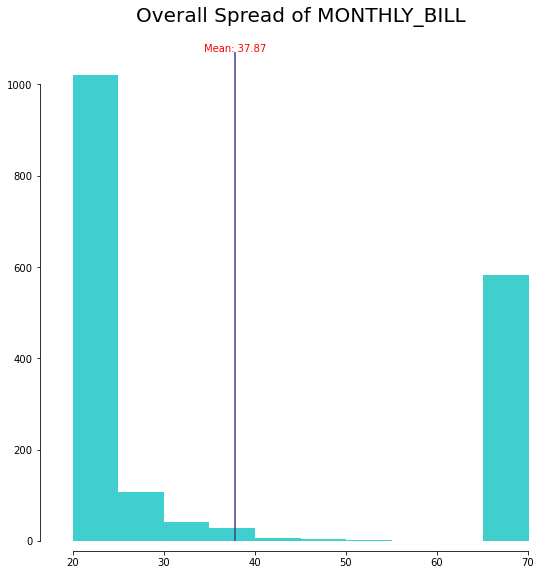

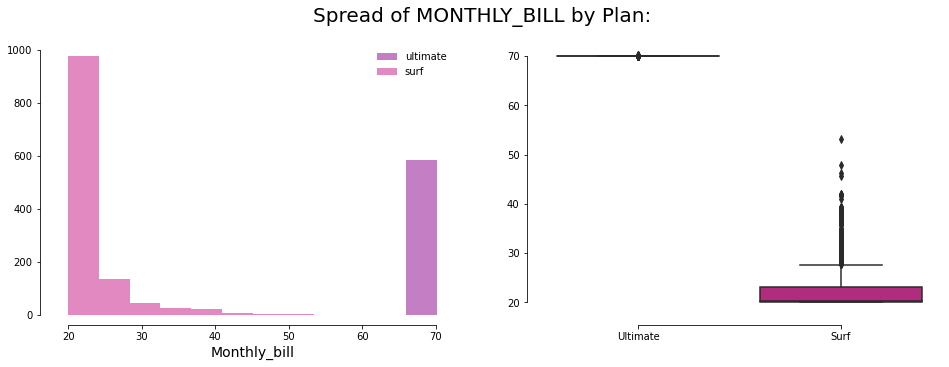

In [46]:
final_data[['monthly_bill']].apply(hist)
final_data[['monthly_bill']].apply(subplots);

In [47]:
#Number of instances exceeding base for both plans
print('Number of bills that exceeded base for SURF:',len(final_data.query('plan=="surf"')[final_data['monthly_bill']>20]))

print('Number of bills that exceeded base for ULTIMATE:',len(final_data.query('plan=="ultimate"')[final_data['monthly_bill']>70]))

print('Percent of bills that exceeded base for SURF:',len(final_data.query('plan=="surf"')[final_data['monthly_bill']>20])/
      len(final_data.query('plan=="surf"')))
print('Percent of bills that exceeded base for ULTIMATE:',len(final_data.query('plan=="ultimate"')[final_data['monthly_bill']>70])/
      len(final_data.query('plan=="ultimate"')))

Number of bills that exceeded base for SURF: 919
Number of bills that exceeded base for ULTIMATE: 39
Percent of bills that exceeded base for SURF: 0.5842339478703115
Percent of bills that exceeded base for ULTIMATE: 0.05416666666666667


<ipython-input-47-4737a5d675c3>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('Number of bills that exceeded base for SURF:',len(final_data.query('plan=="surf"')[final_data['monthly_bill']>20]))
<ipython-input-47-4737a5d675c3>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('Number of bills that exceeded base for ULTIMATE:',len(final_data.query('plan=="ultimate"')[final_data['monthly_bill']>70]))
<ipython-input-47-4737a5d675c3>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('Percent of bills that exceeded base for SURF:',len(final_data.query('plan=="surf"')[final_data['monthly_bill']>20])/
<ipython-input-47-4737a5d675c3>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('Percent of bills that exceeded base for ULTIMATE:',len(final_data.query('plan=="ultimate"')[final_data['monthly_bill']>70])/


In [48]:
surf_limit=final_data[final_data['plan']=="surf"] 
surf_limit=surf_limit[surf_limit['monthly_bill']>20]
ultimate_limit=final_data[final_data['plan']=="ultimate"] 
ultimate_limit=ultimate_limit[ultimate_limit['monthly_bill']>70]
print('Number of users that have exceeded base for surf:',surf_limit['user_id'].nunique())
print('Percent of users that have exceeded base for surf:',surf_limit['user_id'].nunique()/final_data.query('plan=="surf"')['user_id'].nunique())
print('Number of users that have exceeded base for ultimate:',ultimate_limit['user_id'].nunique())
print('Percent of users that have exceeded base for ultimate:',ultimate_limit['user_id'].nunique()/final_data.query('plan=="ultimate"')['user_id'].nunique())

Number of users that have exceeded base for surf: 242
Percent of users that have exceeded base for surf: 0.7267267267267268
Number of users that have exceeded base for ultimate: 17
Percent of users that have exceeded base for ultimate: 0.10828025477707007


In [49]:
#Surf instances/users exceeding ultimate base fee
print('Number of bills that exceeded base for SURF:',len(final_data.query('plan=="surf"')[final_data['monthly_bill']>70]))
print('Percent of bills that exceeded base for SURF:',len(final_data.query('plan=="surf"')[final_data['monthly_bill']>70])/
      len(final_data.query('plan=="surf"')))
surf_exceed_ultimate=final_data[final_data['plan']=="surf"] 
surf_exceed_ultimate=surf_exceed_ultimate[surf_exceed_ultimate['monthly_bill']>70]
print('Number of surf users that have exceeded base for ultimate:',surf_exceed_ultimate['user_id'].nunique())
print('Percent of surf users that have exceeded base for ultimate:',surf_exceed_ultimate['user_id'].nunique()/final_data.query('plan=="surf"')['user_id'].nunique())

Number of bills that exceeded base for SURF: 0
Percent of bills that exceeded base for SURF: 0.0
Number of surf users that have exceeded base for ultimate: 0
Percent of surf users that have exceeded base for ultimate: 0.0


<ipython-input-49-4a15363b7dfb>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('Number of bills that exceeded base for SURF:',len(final_data.query('plan=="surf"')[final_data['monthly_bill']>70]))
<ipython-input-49-4a15363b7dfb>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('Percent of bills that exceeded base for SURF:',len(final_data.query('plan=="surf"')[final_data['monthly_bill']>70])/


These histograms make sense: They are skewed right because of the base plans. More than 1/2 of the bills for the surf plan exceed the base fee, accounting for nearly a quarter of the users of this plan. In fact, nearly 1/2 of surf users have exceeded the ultimate base fee at least once accounting for 1/4 of all surf bills. On the other hand, few users of the ultimate plan are going over their base fees each month.  

Now I will look at the differences in the plans for call duration, messages, and mb_used.

### Duration analysis

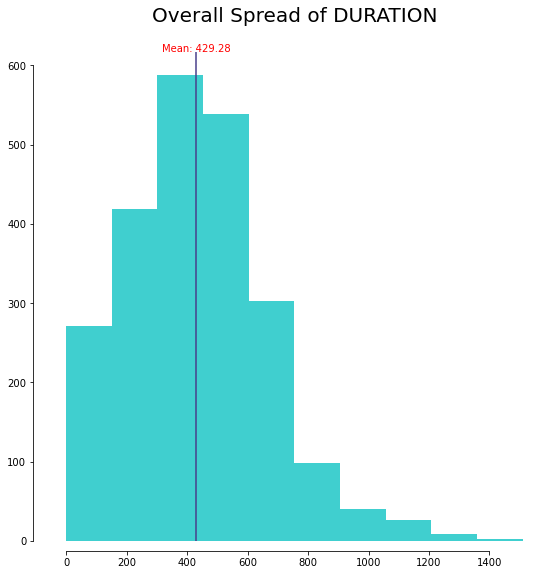

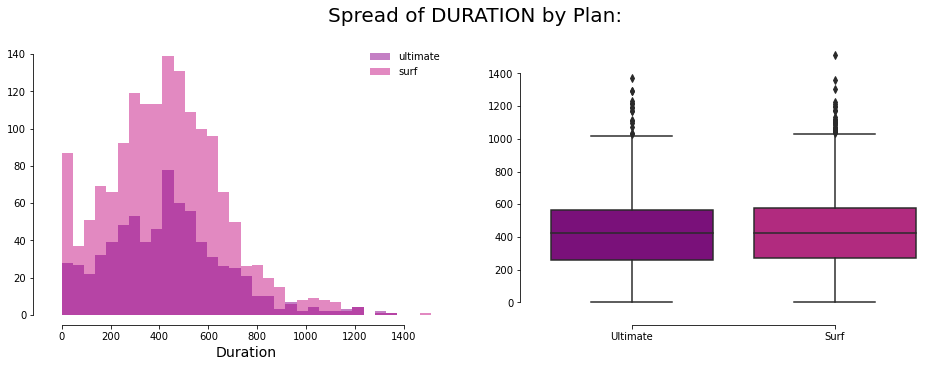

In [50]:
#Apply functions 
final_data[['duration']].apply(hist)
final_data[['duration']].apply(subplots);

In [51]:
final_data.groupby(['plan'])['duration'].agg(['mean','median','max','var','std']).reset_index()

,plan,mean,median,max,var,std
0,surf,428.749523,425.0,1510.0,54968.279461,234.453150
1,ultimate,430.450000,424.0,1369.0,57844.464812,240.508762


Users from both plans seems to follow the same behavior in terms of duration of call as can be seen by similar patterns in the histograms above; except, there are many instances on the surf plan where calls have a low duration. Also, as expected, the ultimate's histogram peaks at a slightly higher x value/slightly more to the right which is not surprising given that users on this plan have a higher free limit. Nonetheless, the mean and median for users of both plans are nearly the same indicating that the time spent on a call is only mildly guided by the plans free limitations.

### Messages analysis

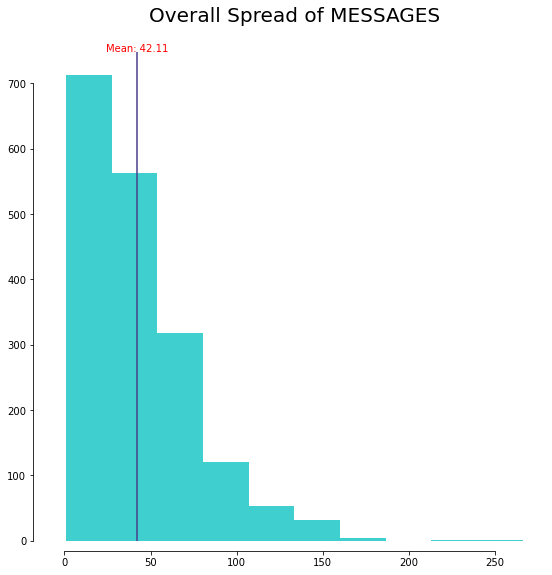

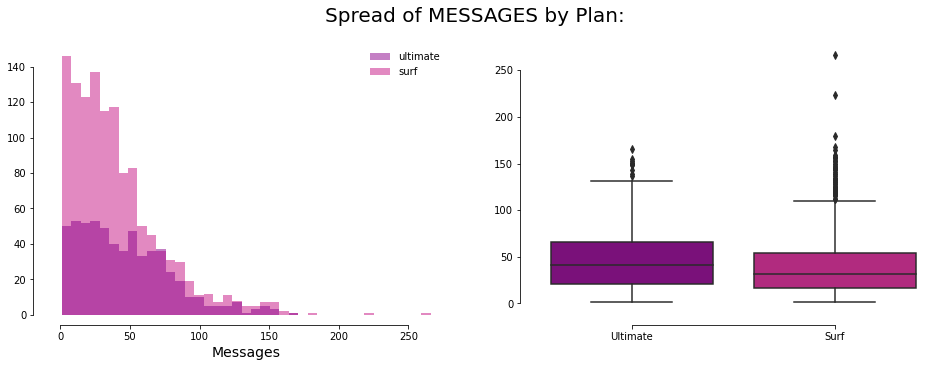

In [52]:
#Apply functions 
final_data[['messages']].apply(hist)
final_data[['messages']].apply(subplots);

In [53]:
final_data.groupby(['plan'])['messages'].agg(['mean','median','max','var','std']).reset_index()

,plan,mean,median,max,var,std
0,surf,40.109656,32.0,266.0,1091.344231,33.035500
1,ultimate,46.296233,41.0,166.0,1085.183108,32.942118


The slopes for the surf plan are steaper and the gap between the mean and median indicates that there is greater variation in message use for users in this plan. The pattern for the ultimate plan users is more steady and the mean and median are closer together.

### Mb analysis

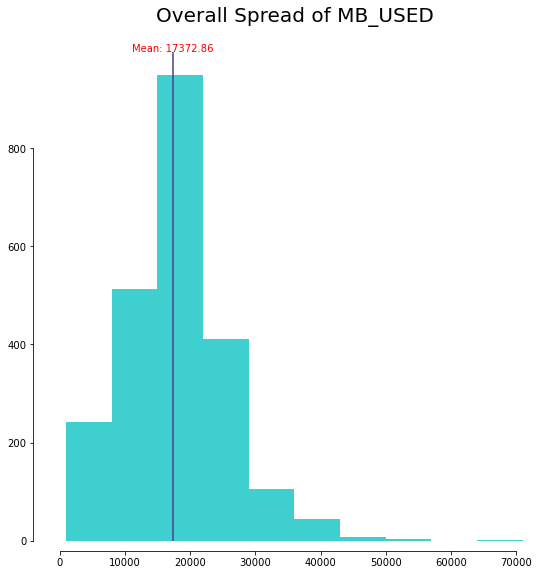

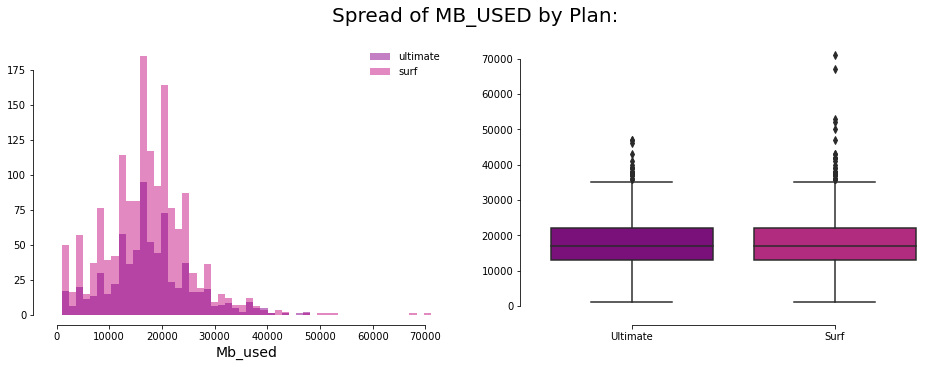

In [54]:
#Apply functions 
final_data[['mb_used']].apply(hist)
final_data[['mb_used']].apply(subplots);

In [55]:
final_data.groupby(['plan'])['mb_used'].agg(['mean','median','max','var','std']).reset_index()

,plan,mean,median,max,var,std
0,surf,17201.540436,17000.0,71000.0,6.205826e+07,7877.706743
1,ultimate,17744.089013,17000.0,47000.0,6.151102e+07,7842.896150


The graphs above indicate that the behavior of the users does not differ too much between plans. For example, Q1 through Q3 on the boxplots are leveled. The histograms are skewed left asn there are few instances of users going over the free plan. The Surf boxplots have more "outliers" because there are more instances of users exceeding their free limit (which means they are not actually outlier, rather just a result of users trying to stay close to or below their free limit).

## Test hypothesis

1. The average revenue from users of Ultimate and Surf calling plans differs.
2. The average revenue from users in NY-NJ area is different from that of the users from other regions.

alpha=.05

### Ultimate vs Surf calling plans 

H0: The average revenue from users of Ultimate and Surf calling does NOT differ.

H1: The average revenue from users of Ultimate and Surf calling plans differs.

In [56]:
#Create 2 sample based on plan
surf_sample=final_data[final_data['plan']=='surf']
ultimate_sample=final_data[final_data['plan']=='ultimate']

In [57]:
#test hypothesis on equality of mean
results = st.ttest_ind(surf_sample['monthly_bill'], ultimate_sample['monthly_bill'],nan_policy='omit')

alpha=.05

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value: 0.0
We reject the null hypothesis


In [58]:
#create user defined function
def t_test(surf_sample,ultimate_sample,alpha=0.05):
    p_value_levene=st.levene(surf_sample,ultimate_sample).pvalue.astype(int)
    if p_value_levene<alpha:
        option_var=False
    else:
        option_var=True
    p_value=st.ttest_ind(surf_sample,ultimate_sample,nan_policy='omit',equal_var=option_var).pvalue.astype(int)
    if p_value<alpha:
        print('Reject H0: average of the first sample is not equal to average of the second sample')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that averages of the first sample \
  and the second sample are not the same") 

#run columns 
for i in final_data.columns:
    if i not in ['message','duration','mb_used', 'monthly_bill']:
        continue
    else:
        print('Result for :',i)
        t_test(surf_sample[i],ultimate_sample[i],alpha=0.05)
        print('----------------------------')  

Result for : duration
Reject H0: average of the first sample is not equal to average of the second sample
----------------------------
Result for : mb_used
Reject H0: average of the first sample is not equal to average of the second sample
----------------------------
Result for : monthly_bill
Reject H0: average of the first sample is not equal to average of the second sample
----------------------------


### NY-NJ vs Other states

H0: The average revenue from users in NY-NJ area is NOT different from that of the users from other regions.
   
H1: The average revenue from users in NY-NJ area is different from that of the users from other regions.

In [59]:
#Create 2 samples based on whether from NY-NJ area
nynj_sample=final_data[final_data['ny_nj']==True]
other_sample=final_data[final_data['ny_nj']==False]

In [60]:
results = st.ttest_ind(nynj_sample['monthly_bill'], other_sample['monthly_bill'],nan_policy='omit')

alpha=.05

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value: 1.4471316661427175e-05
We reject the null hypothesis


In [61]:
#run columns 
for i in final_data.columns:
    if i not in ['message','duration','mb_used', 'monthly_bill']:
        continue
    else:
        print('Result for :',i)
        t_test(nynj_sample[i],other_sample[i],alpha=0.05)
        print('----------------------------')  

Result for : duration
Reject H0: average of the first sample is not equal to average of the second sample
----------------------------
Result for : mb_used
Reject H0: average of the first sample is not equal to average of the second sample
----------------------------
Result for : monthly_bill
Reject H0: average of the first sample is not equal to average of the second sample
----------------------------


## Conclusion

1. 68% of customers prefer the Surf plan to the Ultimate plan.
2. Exceeding free limits: 
    1. More than 1/2 of the bills for the surf plan exceed the base fee, accounting for nearly a quarter of the users of this plan. 
        1. In fact, nearly 1/2 of surf users even exceeded the ultimate base fee at least once accounting for 1/4 of all surf bills. 
    2. On the other hand, few users of the ultimate plan are going over their base fees each month.  
  
3. Overal annual revenue in 2018 was 45% higher from the surf plan. However, revenue per user was 16% higher for the ultimate plan. 
    1. The difference in revenue is statistically significant.
    2. More users are on the surf plan which is what accounts for the higher revenue, but the ultimate plan generates more revenue. 
    3. Possibly pointing out to the surf users who have gone over their limit once, immediately following that event, that they may benefit from the ultimate plan, could encourage them to switch to the plan that is more profitable for the company.

3. User activity was only mildly guided by their plan. Median and means for the Ultimate plan were only slightly higher than for the Surf plan for call duration and mb used; for messages the differences between the 2 plans was slightly more significant.

4. The difference between the average revenue from users in NY-NJ area vs. other regions is not statistically significant.
